In [11]:
base = '/u/ebanner/Classes/nlp/Project/irony-classifier'

In [ ]:
base = '/u/npockrus/NLP/finalProject/venv/src/irony-classifier'

# Load Conservative Sentences

In [12]:
cd /{base}/data/conservative/features/text+sentiment+subreddit+label+progressiviness/

/v/filer4b/v20q001/ebanner/Classes/nlp/Project/irony-classifier/data/conservative/features/text+sentiment+subreddit+label+progressiviness


In [13]:
import pickle
import scipy
import numpy as np

with open('features.p', 'r') as f:
    data = pickle.load(f)

progressivinesses = [ data[sentence]['progressiviness'] for sentence in sorted(data) ]
ys = np.array([ data[sentence]['label'] for sentence in sorted(data) ])

# Separate Positive and Negative Examples

In [14]:
plus_progressivinesses = [ progressiviness for progressiviness, y in zip(progressivinesses, ys) if y == 1 ]

minus_progressivinesses = [ progressiviness for progressiviness, y in zip(progressivinesses, ys) if y == -1 ]

# Progressiviness in Ironic Comments

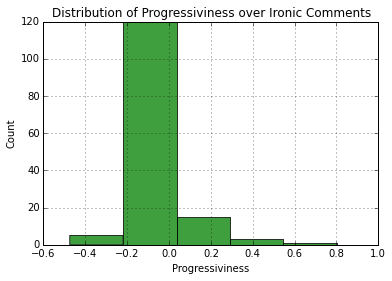

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.hist(plus_progressivinesses, 5, color='green', alpha=0.75)

plt.xlabel('Progressiviness')
plt.ylabel('Count')
plt.title('Distribution of Progressiviness over Ironic Comments')
plt.grid(True)

plt.show()

# Progressiviness in Genuine Comments

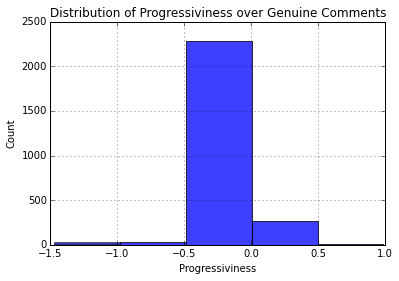

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.hist(minus_progressivinesses, 5, facecolor='blue', alpha=0.75)

plt.xlabel('Progressiviness')
plt.ylabel('Count')
plt.title('Distribution of Progressiviness over Genuine Comments')
plt.grid(True)

plt.show()

# KL Divergence

In [72]:
import scipy.stats

plus_bins = np.histogram(plus_progressivinesses, bins=np.linspace(-1.5, 1.5, num=50))[0]
minus_bins = np.histogram(minus_progressivinesses, bins=np.linspace(-1.5, 1.5, num=50))[0]

In [73]:
smoothed_plusses = [ plus+1 for plus in plus_bins ]
smoothed_minuses = [ minus+1 for minus in minus_bins ]

In [74]:
np.linspace(-1.5, 1.5)

array([-1.5       , -1.43877551, -1.37755102, -1.31632653, -1.25510204,
       -1.19387755, -1.13265306, -1.07142857, -1.01020408, -0.94897959,
       -0.8877551 , -0.82653061, -0.76530612, -0.70408163, -0.64285714,
       -0.58163265, -0.52040816, -0.45918367, -0.39795918, -0.33673469,
       -0.2755102 , -0.21428571, -0.15306122, -0.09183673, -0.03061224,
        0.03061224,  0.09183673,  0.15306122,  0.21428571,  0.2755102 ,
        0.33673469,  0.39795918,  0.45918367,  0.52040816,  0.58163265,
        0.64285714,  0.70408163,  0.76530612,  0.82653061,  0.8877551 ,
        0.94897959,  1.01020408,  1.07142857,  1.13265306,  1.19387755,
        1.25510204,  1.31632653,  1.37755102,  1.43877551,  1.5       ])

In [75]:
zip(smoothed_plusses, smoothed_minuses)

[(1, 2),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 2),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 22),
 (1, 1),
 (1, 5),
 (1, 5),
 (1, 8),
 (1, 2),
 (1, 8),
 (1, 2),
 (2, 8),
 (1, 14),
 (2, 14),
 (2, 22),
 (3, 46),
 (4, 138),
 (10, 168),
 (28, 738),
 (80, 1173),
 (15, 158),
 (2, 35),
 (2, 20),
 (2, 14),
 (2, 8),
 (1, 3),
 (3, 7),
 (1, 1),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (2, 1),
 (1, 3),
 (1, 1),
 (1, 2),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1)]

In [76]:
scipy.stats.entropy(smoothed_plusses, smoothed_minuses)

0.32297776350946455